In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import StratifiedKFold
from utils import plot_result_score_model

from sklearn.metrics import plot_confusion_matrix

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_csv("winequality-red.csv")

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

<AxesSubplot:>

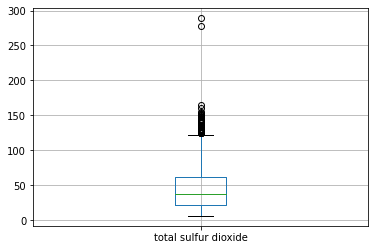

In [8]:
big = ["total sulfur dioxide"]
df[big].boxplot()

<AxesSubplot:>

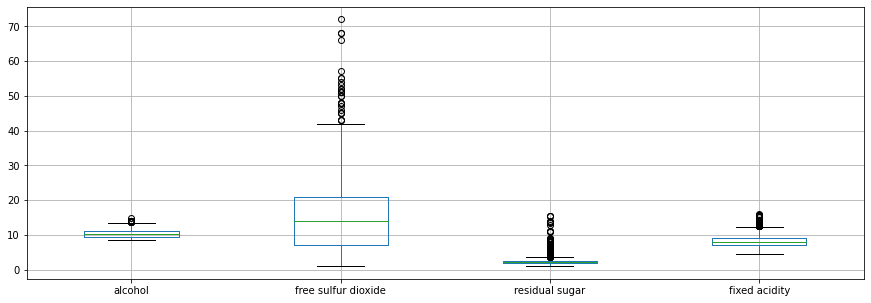

In [9]:
medium = ["alcohol", "free sulfur dioxide", "residual sugar", "fixed acidity" ]
df[medium].boxplot(figsize=(15,5))

<AxesSubplot:>

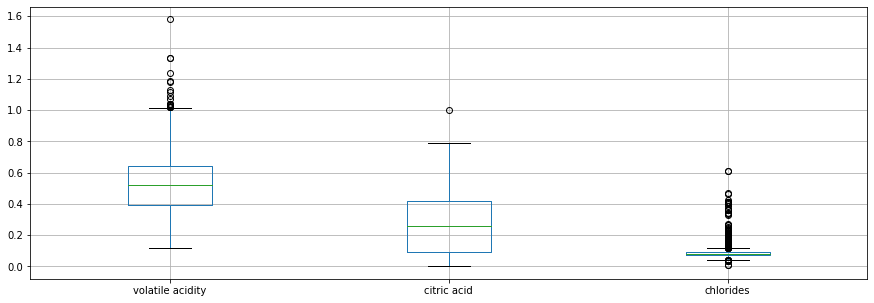

In [10]:
small = [ "volatile acidity", "citric acid", "chlorides" ]
df[small].boxplot(figsize=(15,5))

In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

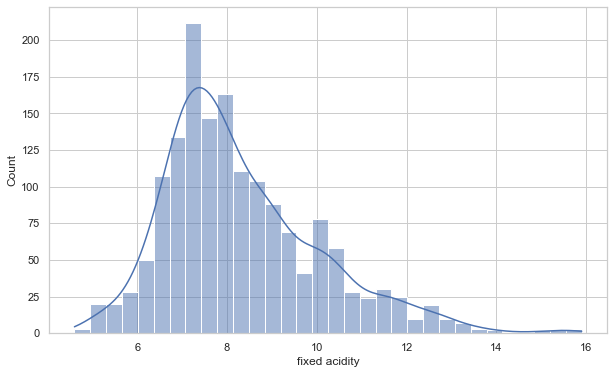

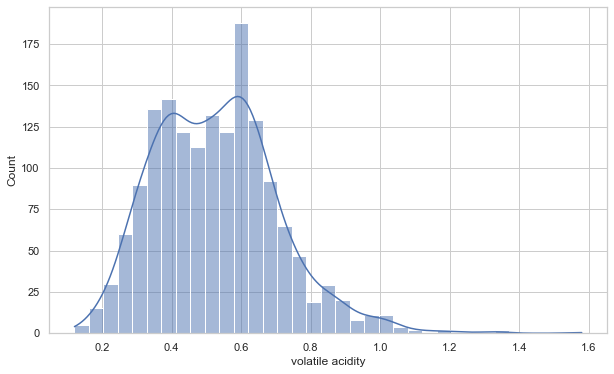

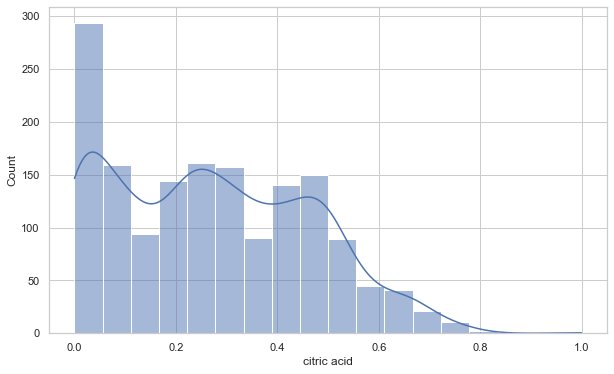

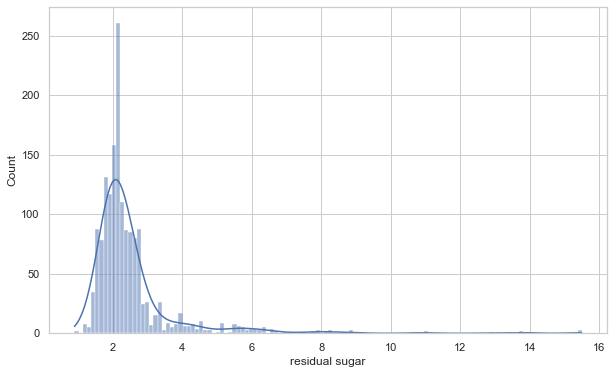

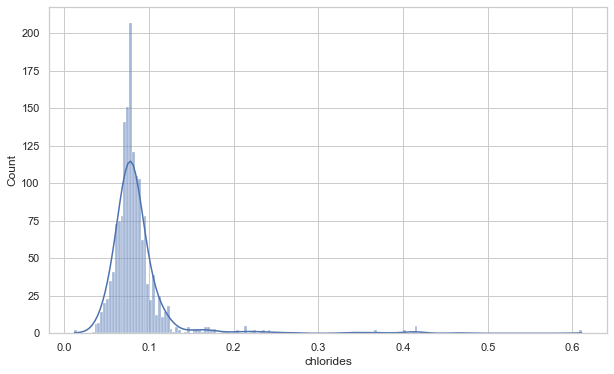

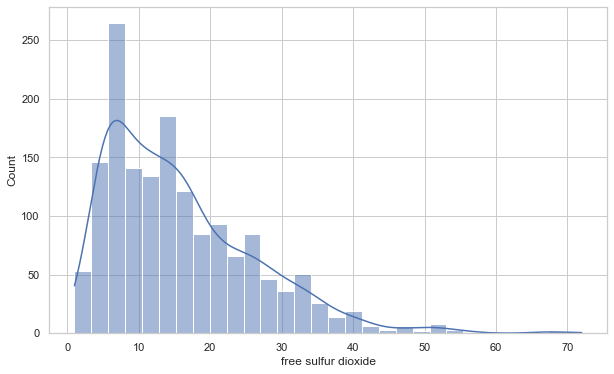

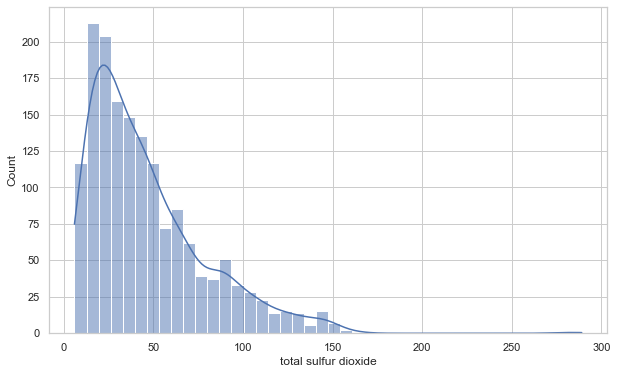

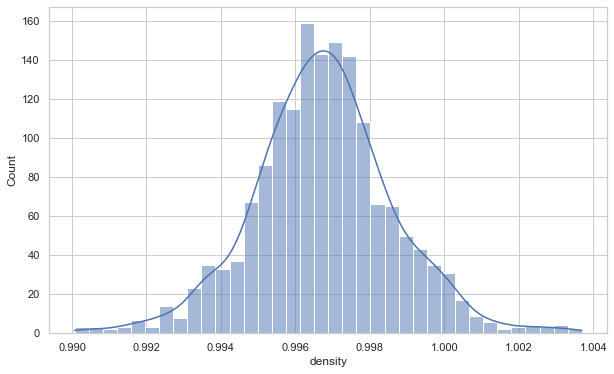

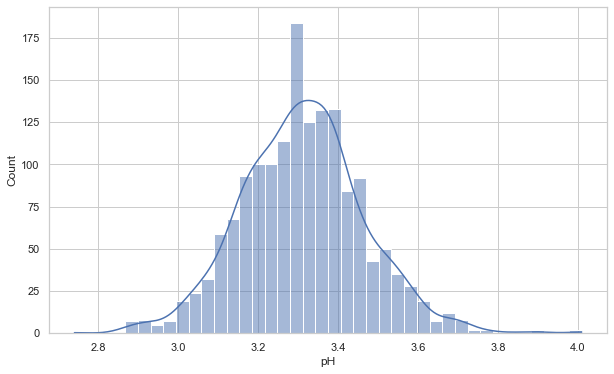

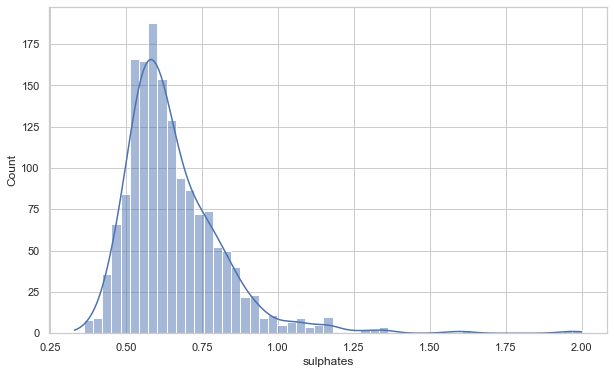

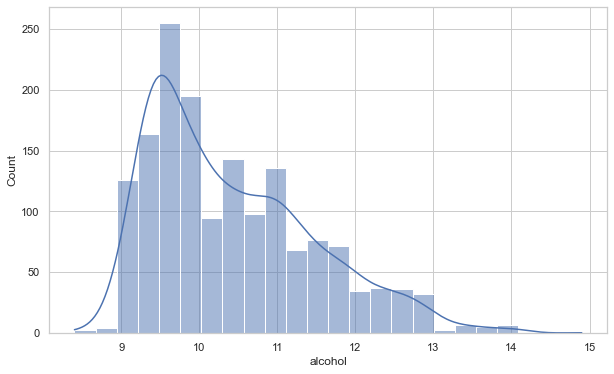

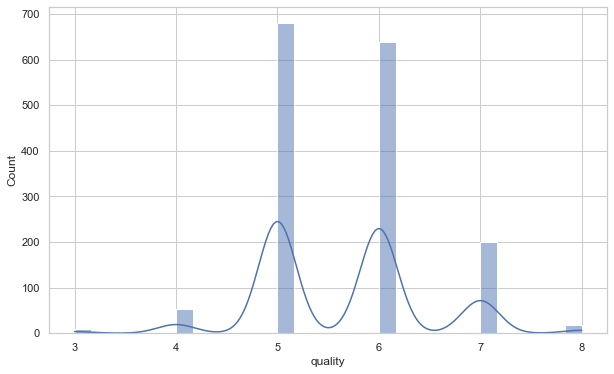

In [12]:
sns.set(style="whitegrid")
for col in df.columns:
    fig = plt.figure(figsize = (10,6))
    sns.histplot(data=df[col], kde=True)

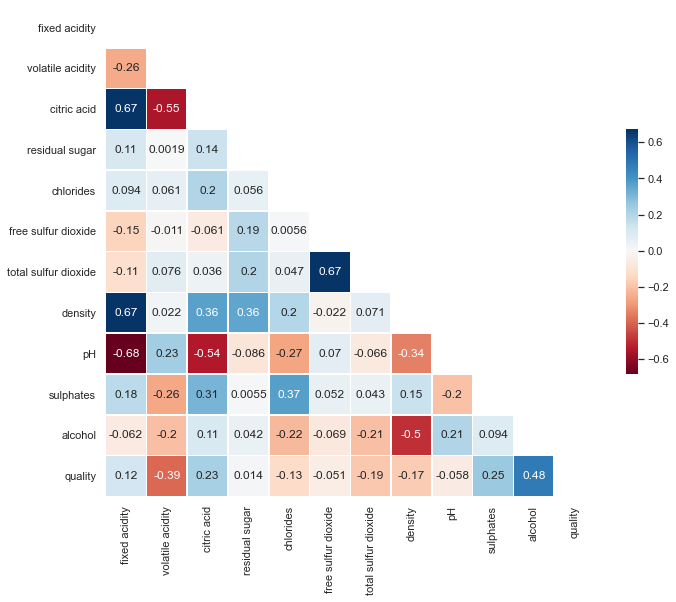

In [13]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = 'RdBu'

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(df.corr(), mask=mask, annot=True, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

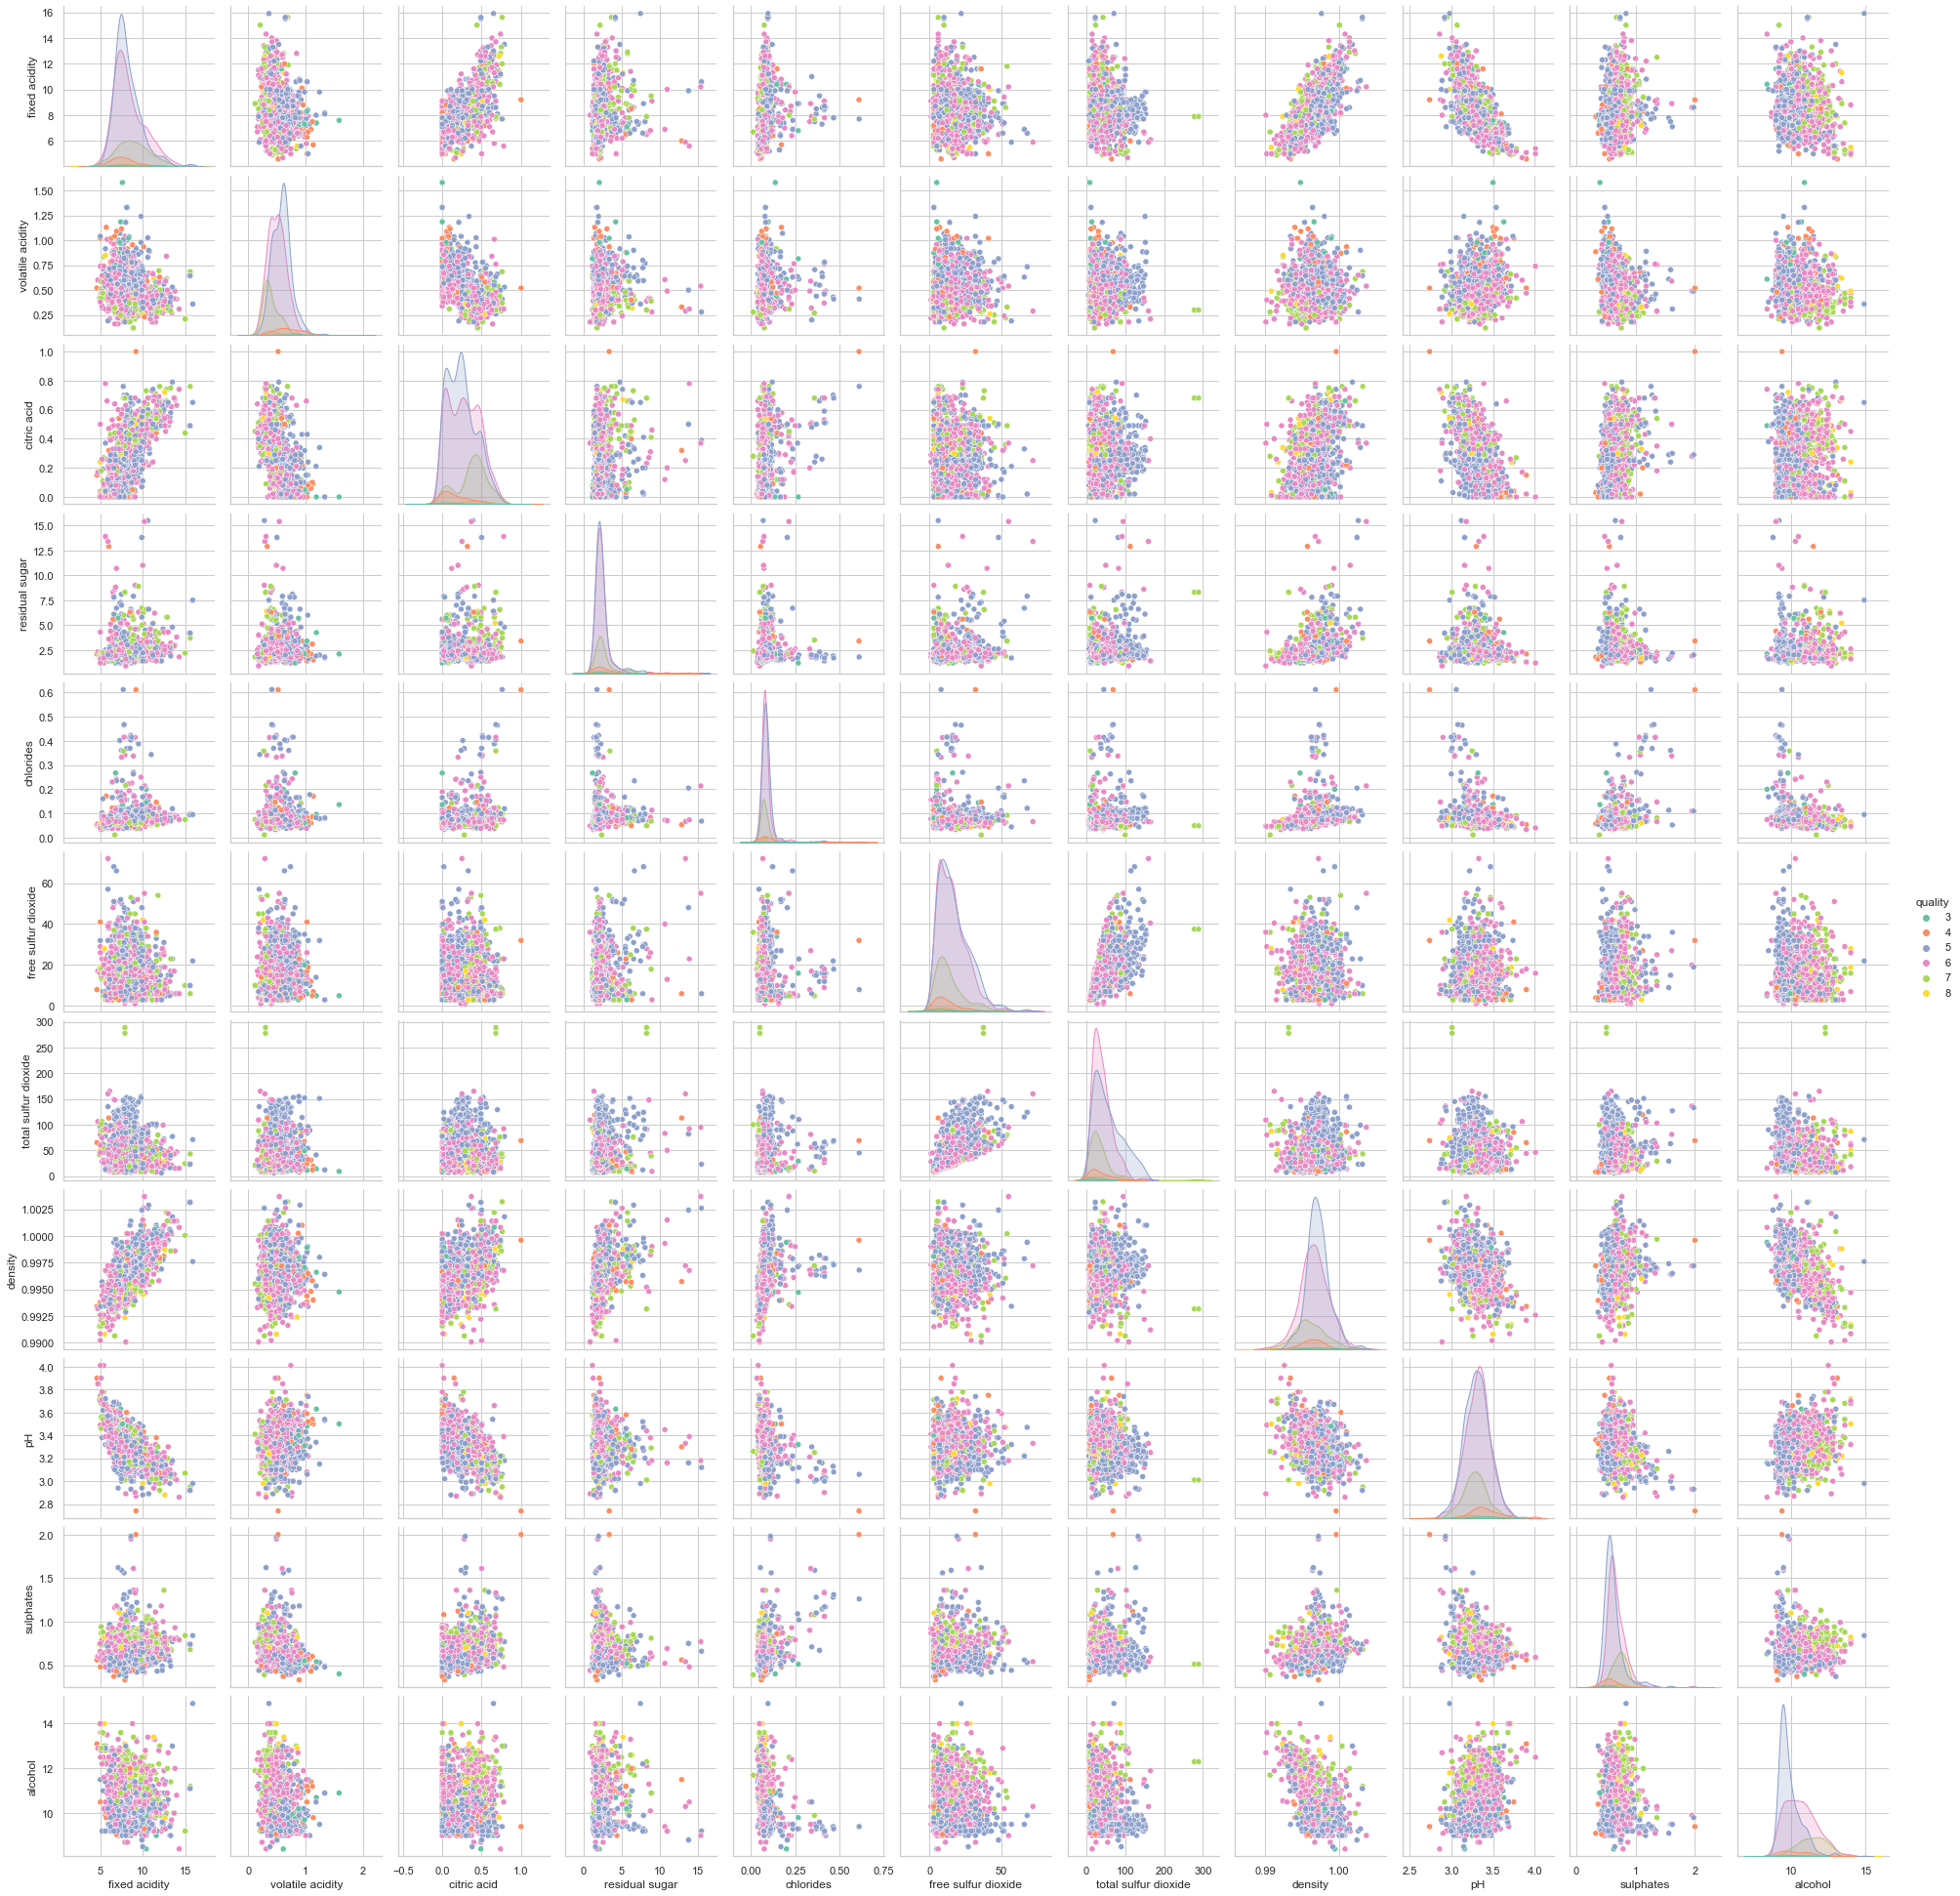

In [14]:
sns.pairplot(df, hue = 'quality', palette="Set2")
plt.show()

In [15]:
bins = (2, 6.5, 8)
labels = [0, 1]
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

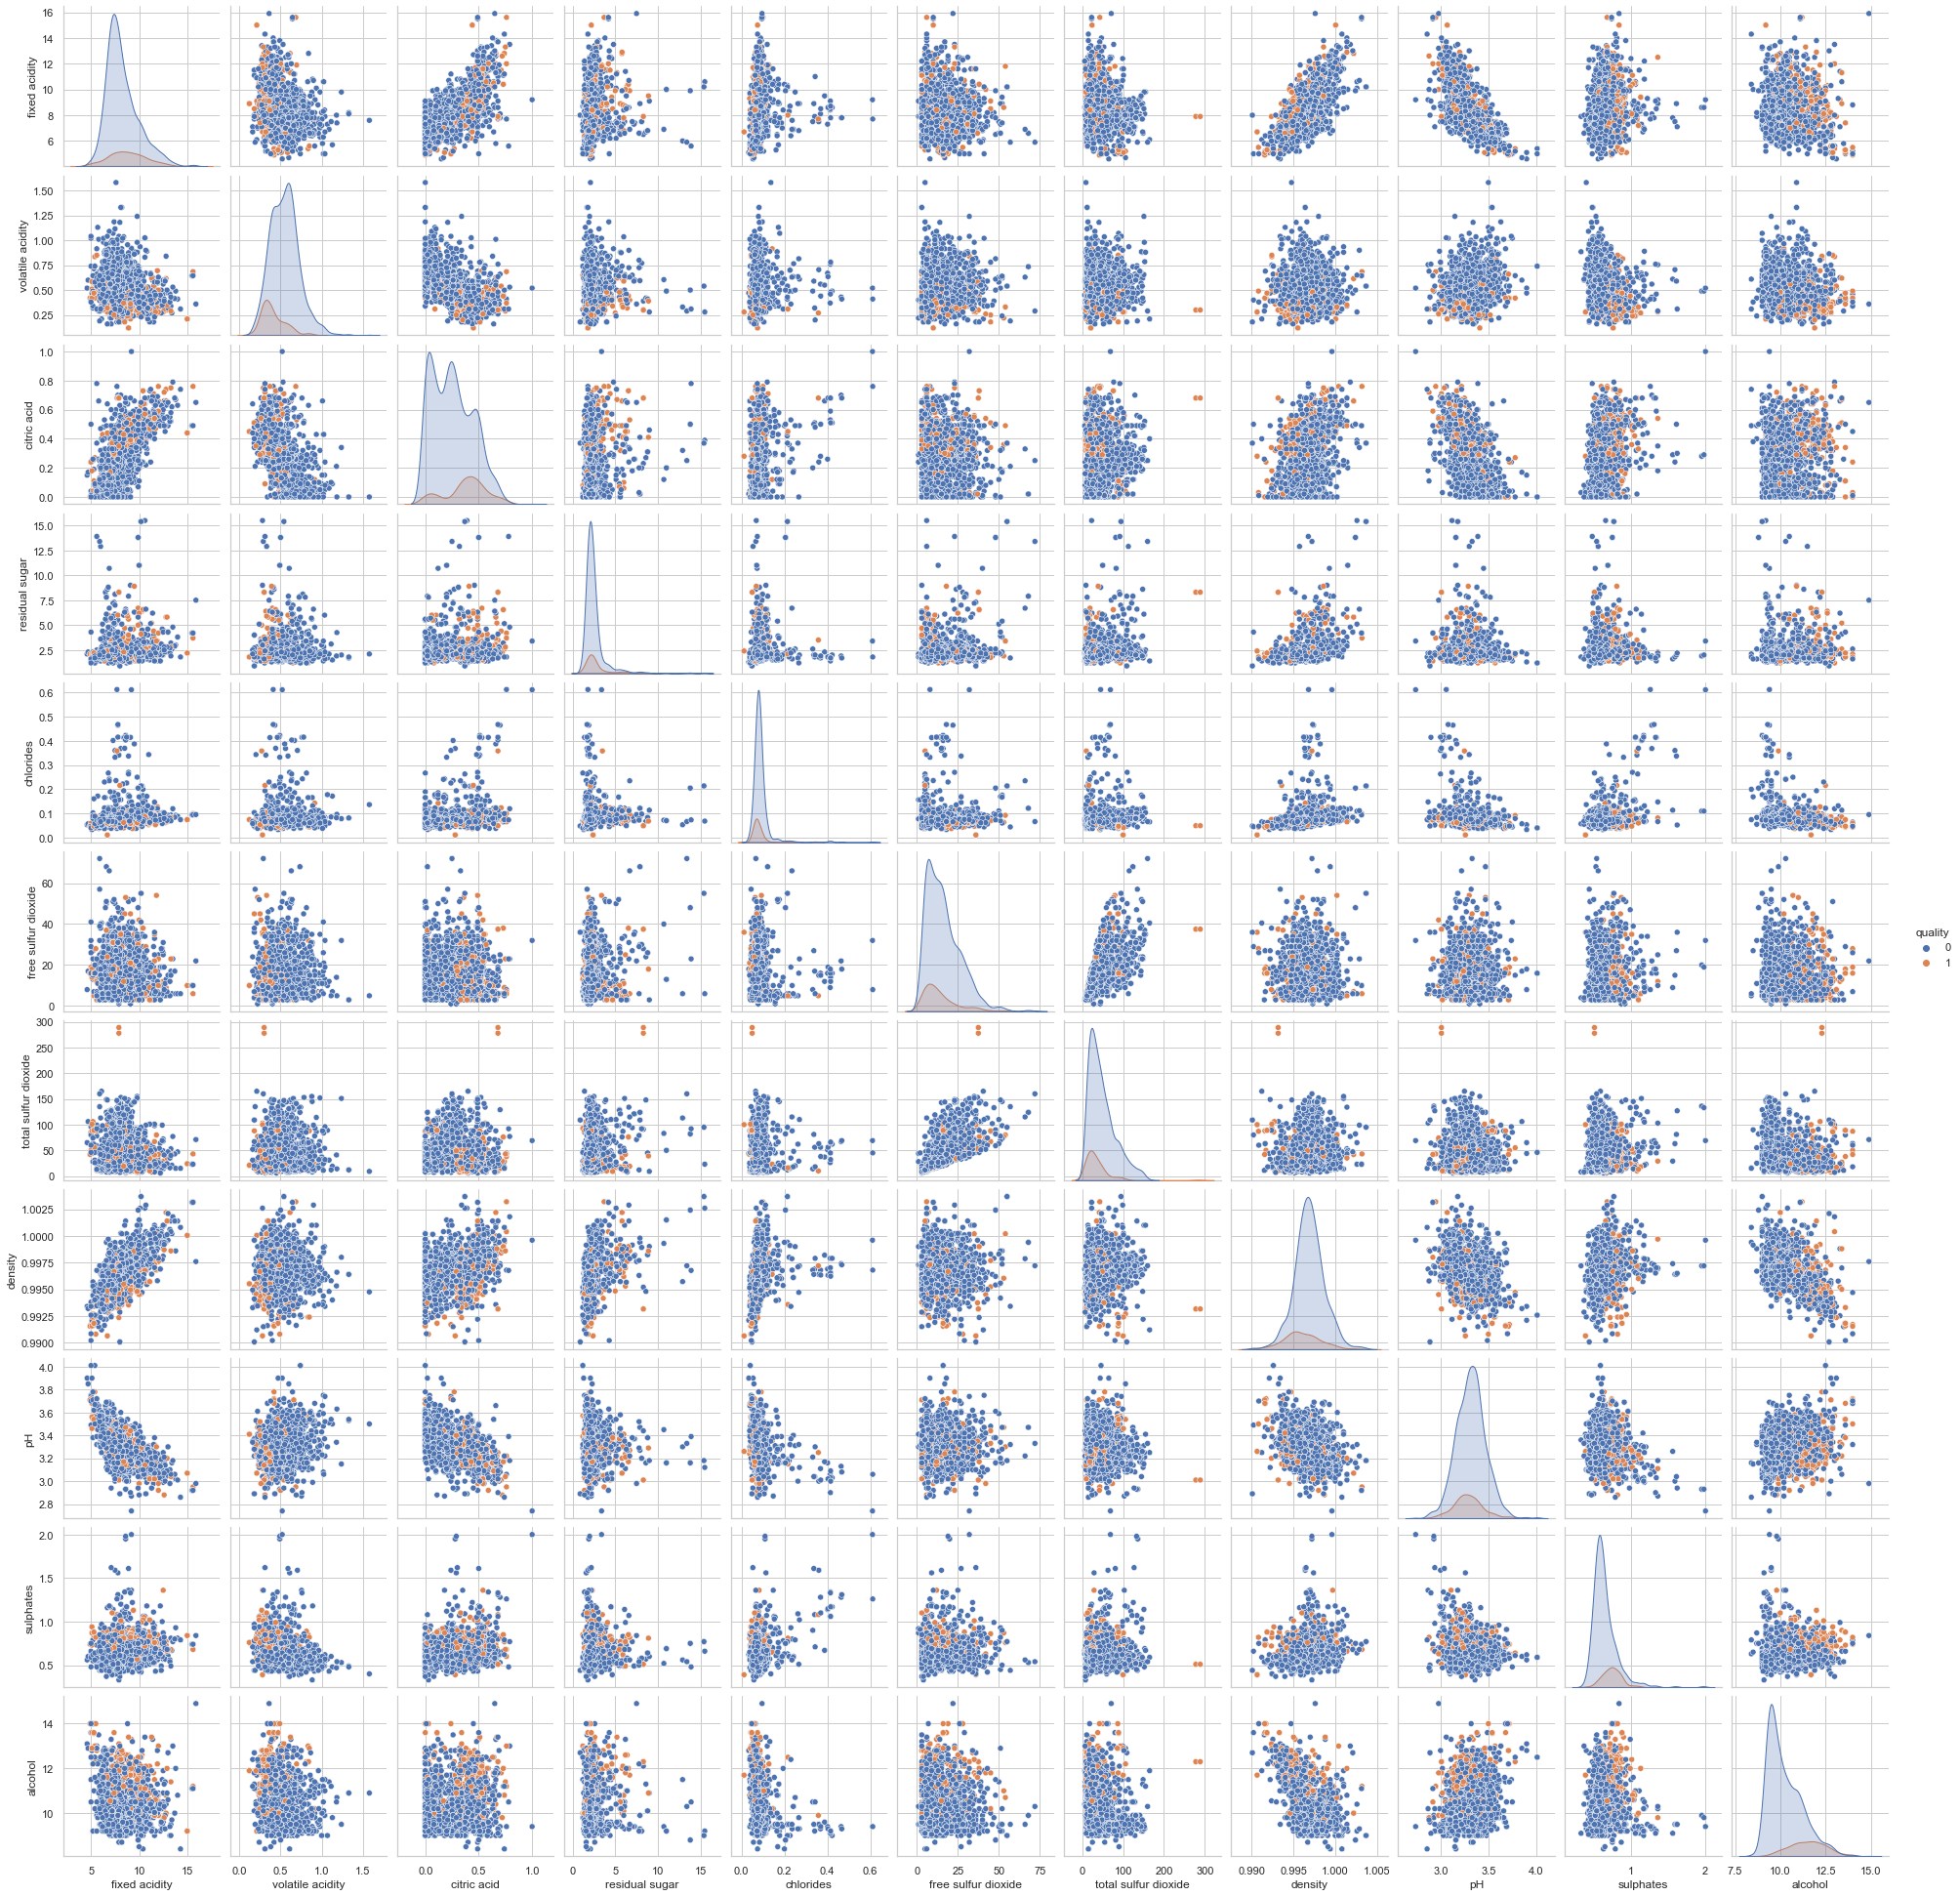

In [16]:
sns.pairplot(df, hue = 'quality')
plt.show()

In [17]:
target = df["quality"]

In [18]:
features = df[ df.columns[df.columns != "quality"] ]

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
scaler = StandardScaler()
scaler.fit_transform(features) 
features = scaler.transform(features) 

In [21]:
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = test_size, random_state = 42, stratify=target)

Score :  0.9
SVC Acc :  0.9


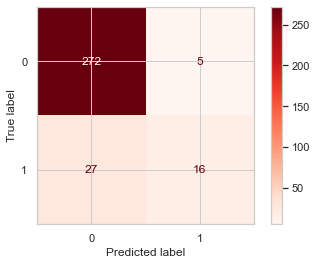

In [22]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

cm_svc = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
score = svc.score(X_test, y_test)

print("Score : ", score)
print("SVC Acc : ", acc)

plot_confusion_matrix(svc, X_test, y_test, cmap= "Reds")  
plt.show()

In [23]:
print("SVC Classification Report")
print(classification_report(y_test, pred))

SVC Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.76      0.37      0.50        43

    accuracy                           0.90       320
   macro avg       0.84      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



In [26]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

classifier = SVC()

params = {
    'C': [0.1,0.8,1,5,10],
#     'kernel':["linear", "poly", "rbf", "sigmoid"],
    'kernel':["linear", "rbf", "sigmoid"],
    'gamma' :[0.1,0.8,1,5,10]
}

scoring = ["accuracy", "f1","roc_auc"]

best_classifier = GridSearchCV(
        classifier, 
        params,
        cv=10,
        scoring=scoring, 
        refit="accuracy", 
        n_jobs=-1, 
        return_train_score=True,
        verbose=3
        )

best_classifier.fit(features,target)

results = best_classifier.cv_results_
best_params = best_classifier.best_params_

print(type(classifier).__name__)
print("\n")
print("Best scores:")
print(best_classifier.best_score_)
print("Best params:")
print(best_params)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
SVC


Best scores:
0.8793081761006288
Best params:
{'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}


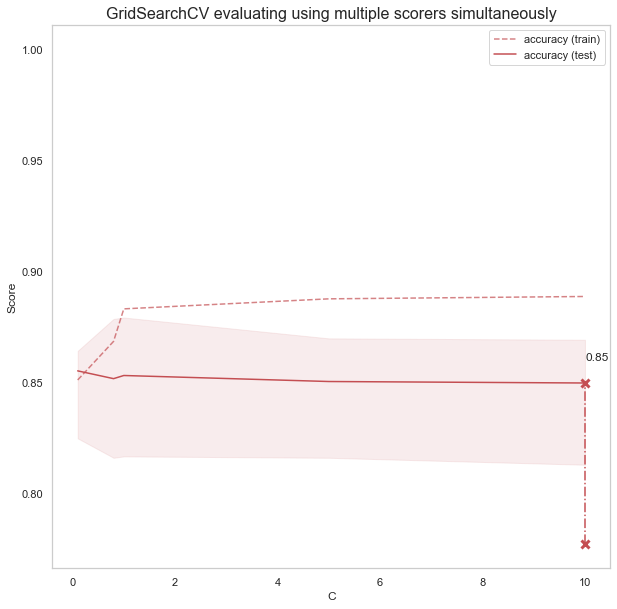

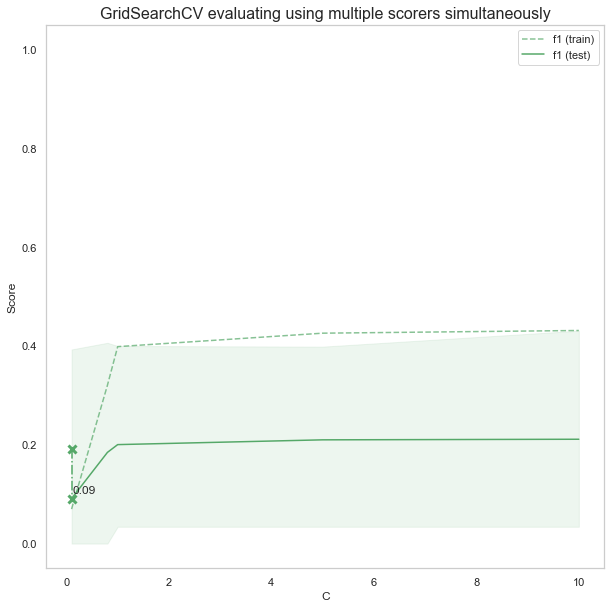

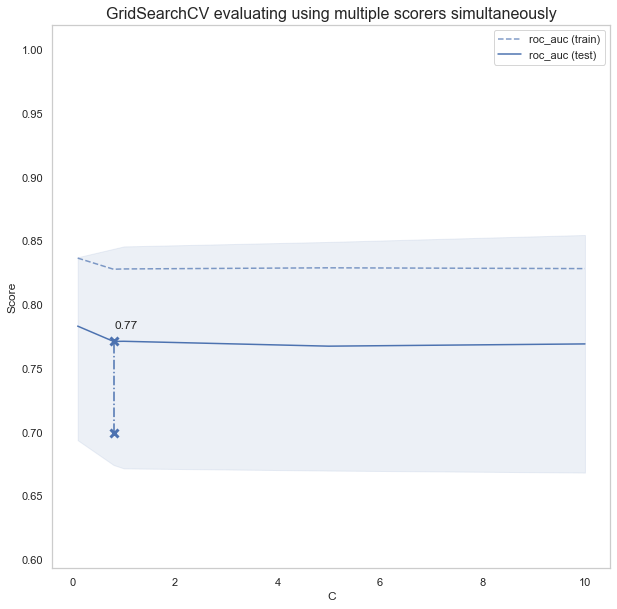

In [27]:
plot_result_score_model(results,scoring,'C')

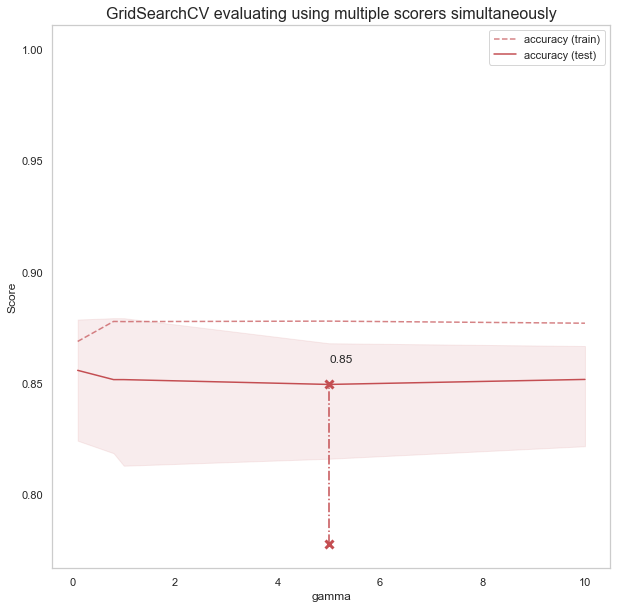

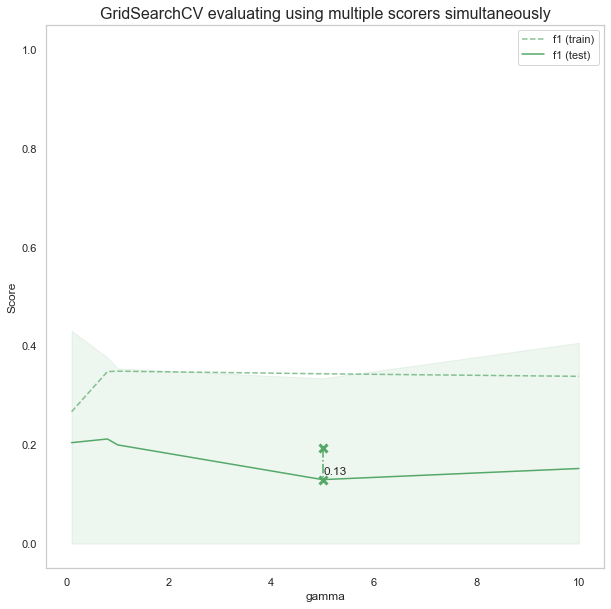

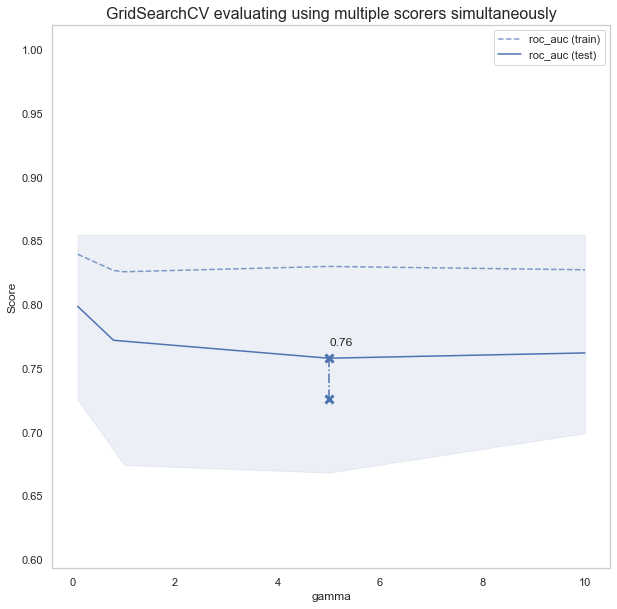

In [28]:
plot_result_score_model(results,scoring,'gamma')

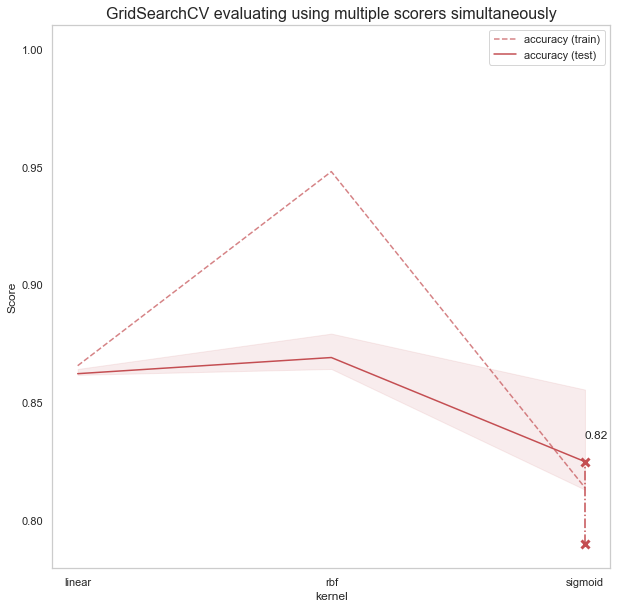

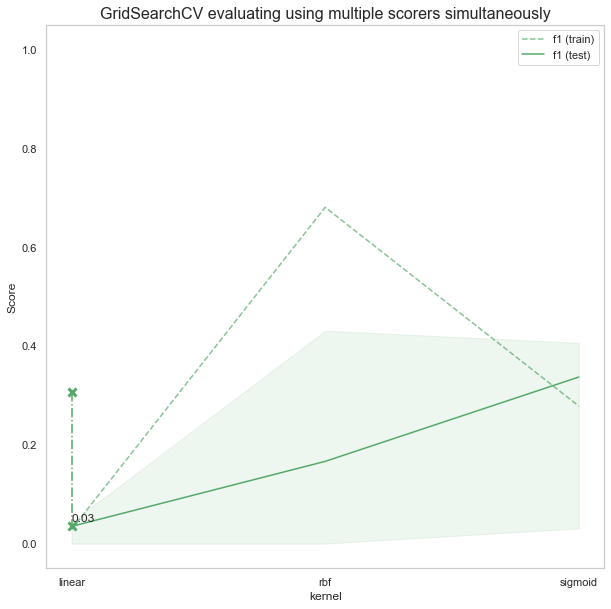

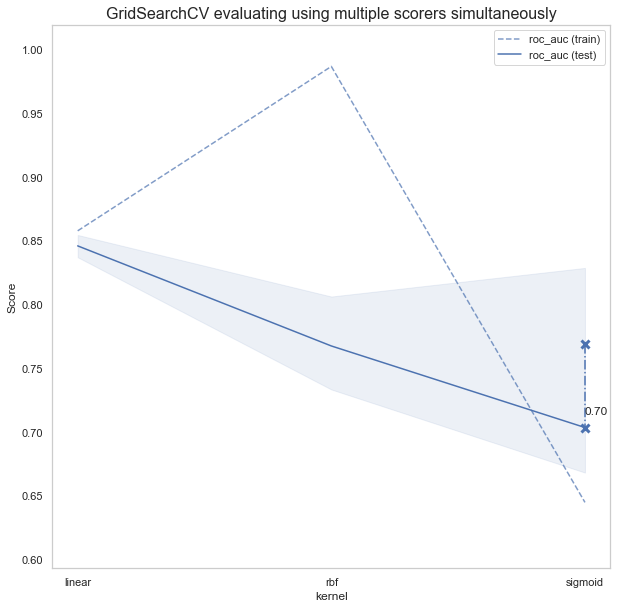

In [29]:
plot_result_score_model(results,scoring,'kernel')

Score :  0.915625
SVC Acc :  0.915625


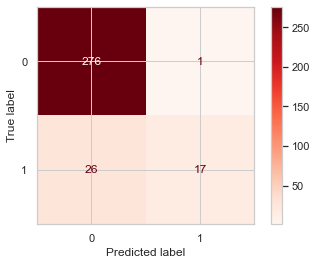

In [30]:
svc = SVC(**best_params)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

cm_svc = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
score = svc.score(X_test, y_test)

print("Score : ", score)
print("SVC Acc : ", acc)

plot_confusion_matrix(svc, X_test, y_test, cmap= "Reds")  
plt.show()

In [31]:
print("SVC Classification Report")
print(classification_report(y_test, pred))

SVC Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       277
           1       0.94      0.40      0.56        43

    accuracy                           0.92       320
   macro avg       0.93      0.70      0.76       320
weighted avg       0.92      0.92      0.90       320

